In [3]:

import numpy as np
import matplotlib.pyplot as plt
import time

%load_ext autoreload
%autoreload 2


In [46]:
def hit_run(N, alpha):
    dim = 2
    dirs = np.random.normal(size=(N, dim)) # sample gaussian and normalize 
    dirs = dirs/np.linalg.norm(dirs, axis=1).reshape(-1, 1)
    radius = 1
    beta_p = (np.random.beta(alpha, alpha, size=(N, 1)) - 0.5) * 2 * radius 
    return dirs * beta_p
    

In [47]:
def get_A(xs):
    """xs.shape = [N, d]"""
    xs -= np.mean(xs, axis=0)
    curr_m = None
    for i in range(len(xs)):
        if curr_m is None:
            curr_m = np.outer(xs[i]**2, xs[i]**2)
        else:
            curr_m += np.outer(xs[i]**2, xs[i]**2)
    curr_m /= len(xs)
    return curr_m

In [52]:
beta_int = 1.04063 * 1e-6 * 2**5 #
theta_int = np.pi / 4.

beta_norm = 0.000793651 * 2 #
theta_norm = 2 * np.pi

beta_int * theta_int / (beta_norm * theta_norm)

0.0026223869181794006

In [53]:
get_A(xs)

array([[0.00783938, 0.00261112],
       [0.00261112, 0.00772915]])

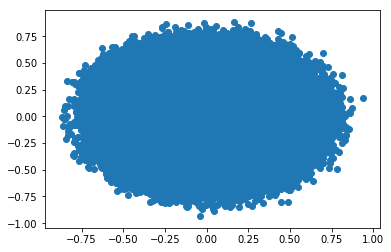

In [50]:
N = 200000
xs = hit_run(N, 5)
plt.scatter(xs[:, 0], xs[:, 1])